In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from collections import defaultdict
import shutil
from tqdm.notebook import tqdm
from wish_utils import *

In [4]:
workspaces_dir = "/home/wj1132075/Desktop/Raw_Data/Workspaces/"
labels_dir = "/home/wj1132075/Desktop/Raw_Data/Labels/"

In [5]:
annotations_output_dir = "/home/wj1132075/Desktop/CNN_Model_Data/TubeByTubeWithNeighbours/Annotations/"
frames_output_dir = "/home/wj1132075/Desktop/CNN_Model_Data/TubeByTubeWithNeighbours/FrameData/"

In [9]:
# label_f_name = "labels_32.txt"
# ws_index = label_f_name.split('.')[0].split('_')[-1]
# label_f_path = os.path.join(labels_dir, label_f_name)
# labels = np.loadtxt(label_f_path, delimiter=',', dtype=int)
# ws_f_name = f"workspace_{label_f_name.split('.')[0].split('_')[-1]}.npz"
# ws_f_path = os.path.join(workspaces_dir, ws_f_name)
# ws = np.load(ws_f_path)['arr_0']
# print(ws.shape)

In [ ]:
58

In [10]:
annot_f_path =  os.path.join(annotations_output_dir,os.listdir(annotations_output_dir)[43]) 
with open(annot_f_path, 'rb') as handle:
    annot_dict = pickle.load(handle)
    # print(annot_dict)
    frame_data = np.load(annot_dict['nparr_path'])['arr_0']
annot_dict

{'nparr_path': '/home/wj1132075/Desktop/CNN_Model_Data/TubeByTubeWithNeighbours/FrameData/32_14.npz',
 'peaks': [(21, 484, 485, 487),
  (42, 488, 489, 491),
  (63, 489, 490, 492),
  (84, 489, 490, 492),
  (21, 699, 700, 704),
  (53, 704, 704, 709),
  (84, 704, 704, 709),
  (21, 1066, 1066, 1071),
  (84, 1070, 1071, 1075)],
 'tube': 496}

In [12]:
frame_data.shape

(128, 1540)

In [11]:
annot_dict

{'nparr_path': '/home/wj1132075/Desktop/CNN_Model_Data/TubeByTubeWithNeighbours/FrameData/32_14.npz',
 'peaks': [(21, 484, 485, 487),
  (42, 488, 489, 491),
  (63, 489, 490, 492),
  (84, 489, 490, 492),
  (21, 699, 700, 704),
  (53, 704, 704, 709),
  (84, 704, 704, 709),
  (21, 1066, 1066, 1071),
  (84, 1070, 1071, 1075)],
 'tube': 496}

In [16]:
peaks=annot_dict['peaks']

In [17]:
peaks

[(21, 484, 485, 487),
 (42, 488, 489, 491),
 (63, 489, 490, 492),
 (84, 489, 490, 492),
 (21, 699, 700, 704),
 (53, 704, 704, 709),
 (84, 704, 704, 709),
 (21, 1066, 1066, 1071),
 (84, 1070, 1071, 1075)]

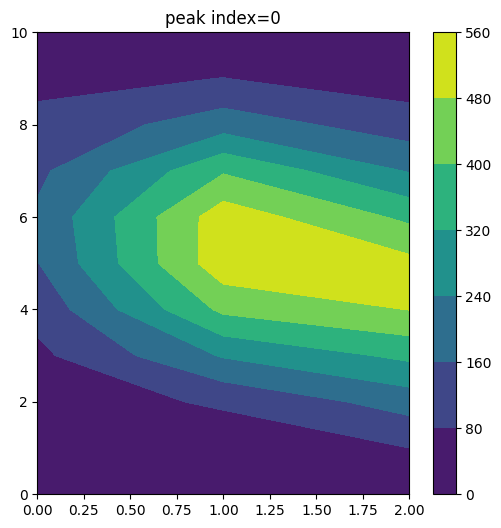

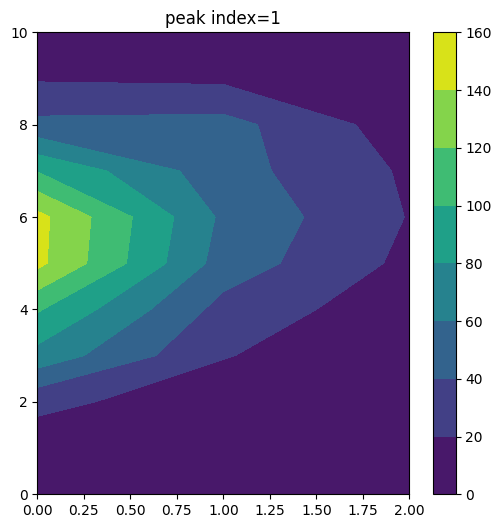

In [46]:
annot_f_path =  os.path.join(annotations_output_dir,os.listdir(annotations_output_dir)[42]) 
with open(annot_f_path, 'rb') as handle:
    annot_dict = pickle.load(handle)
    frame_data = np.load(annot_dict['nparr_path'])['arr_0']
peaks = annot_dict['peaks']
for p_index, peak in enumerate(peaks):
    chn_width = 5
    peak_ch = peaks[p_index][0]
    t_start = peaks[p_index][1]
    t_end = peaks[p_index][3]
    data=frame_data[peak_ch-chn_width : peak_ch+chn_width+1, t_start:t_end]
    plt.figure(figsize=(6,6))
    cs = plt.contourf(data)
    plt.colorbar(cs) 
    plt.title(f"peak index={p_index}")
    plt.show()

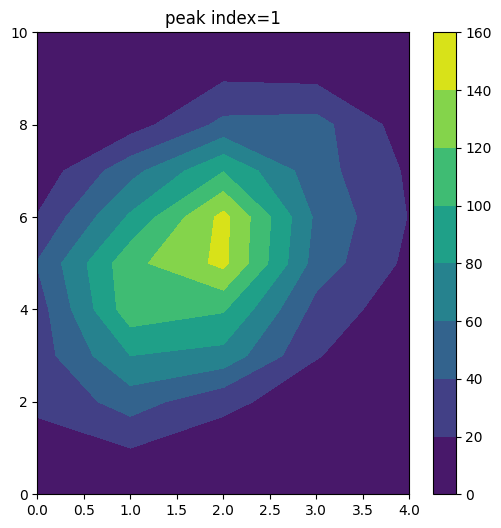

In [52]:
p_index = 1
chn_width = 5
peak_ch = peaks[p_index][0]
t_start = peaks[p_index][1]
t_end = peaks[p_index][3]
data=frame_data[peak_ch-chn_width : peak_ch+chn_width+1, t_start-2:t_end]
plt.figure(figsize=(6,6))
cs = plt.contourf(data)
plt.colorbar(cs) 
plt.title(f"peak index={p_index}")
plt.show()

In [25]:
data

array([[  1.,   0.,   0.,   1.,   1.,   3.,   2.,   1.,   3.,   2.],
       [  0.,   0.,   1.,   4.,   0.,   6.,   6.,   3.,   2.,   1.],
       [  0.,   1.,   5.,  18.,  12.,   9.,  11.,  10.,   0.,   0.],
       [  1.,   4.,  12.,  42.,  33.,  21.,  12.,   9.,   3.,   1.],
       [  1.,   0.,  21.,  98.,  92.,  47.,  16.,  13.,  11.,   4.],
       [  1.,   5.,  53., 193., 160.,  67.,  50.,  21.,  11.,   9.],
       [  1.,  10.,  63., 265., 227., 111.,  70.,  33.,  13.,   9.],
       [  2.,  13.,  91., 322., 203., 124.,  84.,  37.,  23.,  14.],
       [  2.,  12., 104., 283., 185., 119.,  57.,  38.,  20.,  10.],
       [  1.,  10.,  91., 196., 129.,  66.,  39.,  28.,  13.,   7.],
       [  0.,  12.,  45.,  90.,  70.,  34.,  32.,   7.,   9.,   4.],
       [  0.,   2.,  30.,  46.,  30.,  19.,   8.,   6.,   3.,   3.],
       [  1.,   5.,   7.,  13.,   9.,   8.,   5.,   1.,   2.,   1.],
       [  0.,   2.,   5.,   7.,   3.,   2.,   1.,   1.,   2.,   0.],
       [  0.,   1.,   3.,   1.,   

In [57]:
chn_width=15
a=frame_data[peak_ch-chn_width:peak_ch+chn_width+1, 596]
a

array([  0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   4.,  18.,
        42.,  98., 193., 265., 322., 283., 196.,  90.,  46.,  13.,   7.,
         1.,   0.,   2.,   0.,   4.,   3.,   1.,   3.,   2.])

In [50]:
np.std(a)

108.20794184201985

In [51]:
np.max(a)

322.0

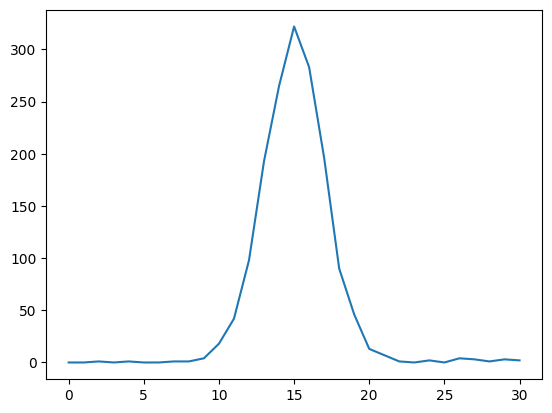

In [58]:
plt.plot(a)

### Do some Analysis on data

{'nparr_path': '/home/wj1132075/Desktop/CNN_Model_Data/TubeByTubeWithNeighbours/FrameData/32_14.npz', 'peaks': [(21, 484, 485, 487), (42, 488, 489, 491), (63, 489, 490, 492), (84, 489, 490, 492), (21, 699, 700, 704), (53, 704, 704, 709), (84, 704, 704, 709), (21, 1066, 1066, 1071), (84, 1070, 1071, 1075), (63, 489, 490, 492), (21, 484, 485, 487), (42, 488, 489, 491), (84, 489, 490, 492), (21, 699, 700, 704), (53, 704, 704, 709), (84, 704, 704, 709), (21, 1066, 1066, 1071), (84, 1070, 1071, 1075), (21, 699, 700, 704), (21, 484, 485, 487), (42, 488, 489, 491), (63, 489, 490, 492), (84, 489, 490, 492), (53, 704, 704, 709), (84, 704, 704, 709), (21, 1066, 1066, 1071), (84, 1070, 1071, 1075), (53, 704, 704, 709), (21, 484, 485, 487), (42, 488, 489, 491), (63, 489, 490, 492), (84, 489, 490, 492), (21, 699, 700, 704), (84, 704, 704, 709), (21, 1066, 1066, 1071), (84, 1070, 1071, 1075), (21, 1066, 1066, 1071), (21, 484, 485, 487), (42, 488, 489, 491), (63, 489, 490, 492), (84, 489, 490, 492), 

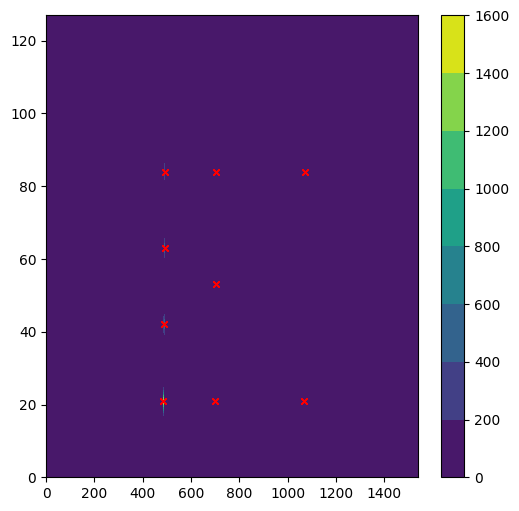

In [22]:
stop = 0
for annot_f_path in os.listdir(annotations_output_dir)[43:44]:
    annot_f_path =  os.path.join(annotations_output_dir,annot_f_path) 
    with open(annot_f_path, 'rb') as handle:
        annot_dict = pickle.load(handle)
        print(annot_dict)
        frame_data = np.load(annot_dict['nparr_path'])['arr_0']
        # print(frame_data.shape)
        plt.figure(figsize=(6,6))
        cs = plt.contourf(frame_data)
        plt.colorbar(cs)
        for x, s, p, e in annot_dict['peaks']:
            print(f"x={p} y={x}")
            plt.plot(p, x, marker="x", markersize=5, markeredgecolor="red", markerfacecolor="red")
        plt.show()

    stop += 1
    if stop == 20:
        break